## K-Nearest Neighbors (KNN) Classification with scikit-learn

Doc : https://scikit-learn.org/stable/modules/neighbors.html & https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

Sklearn Class : KNeighborsClassifier

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Small Dataset - Série TD 3 - Exercice 2

#### Load dataset & Exploration

In [3]:
lst_data = [
    [25, 40000, "No"],
    [35, 60000, "No"],
    [45, 80000, "No"],
    [20, 20000, "No"],
    [35, 120000, "No"],
    [52, 18000, "No"],
    [23, 95000, "Yes"],
    [40, 62000, "Yes"],
    [60, 100000, "Yes"],
    [48, 220000, "Yes"],
    [33, 150000, "Yes"]
]

In [4]:
# Convert to DataFrame
df = pd.DataFrame(lst_data, columns=["Age", "Pret", "Non-remboursement"])

In [5]:
df.head()

,Age,Pret,Non-remboursement
0,25,40000,No
1,35,60000,No
2,45,80000,No
3,20,20000,No
4,35,120000,No


In [6]:
df.shape

(11, 3)

In [7]:
df.columns

Index(['Age', 'Pret', 'Non-remboursement'], dtype='object')

In [8]:
df.describe()

,Age,Pret
count,11.000000,11.000000
mean,37.818182,87727.272727
std,12.623931,59863.329191
min,20.000000,18000.000000
25%,29.000000,50000.000000
50%,35.000000,80000.000000
75%,46.500000,110000.000000
max,60.000000,220000.000000


In [9]:
np.unique(df['Non-remboursement'])

array(['No', 'Yes'], dtype=object)

In [10]:
df['Non-remboursement'].value_counts()

No     6
Yes    5
Name: Non-remboursement, dtype: int64

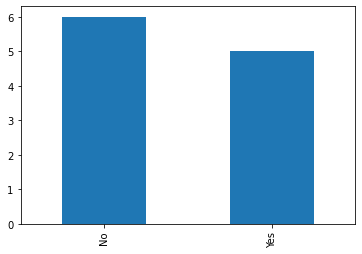

In [11]:
df['Non-remboursement'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Pret'>

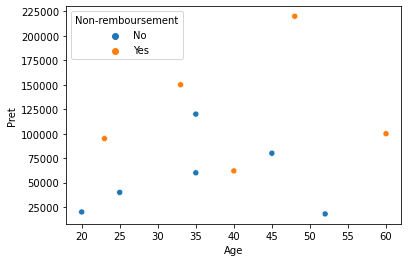

In [12]:
sns.scatterplot(x=df['Age'],y=df['Pret'], hue=df['Non-remboursement'])

#### Splitting the Data

In [13]:
X = df[['Age', 'Pret']]
y = df[['Non-remboursement']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Init & Train a KNN Classifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

#### Evaluate the Model

In [16]:
# Predict on test data
y_pred = knn.predict(X_test)

In [17]:
y_test

,Non-remboursement
5,No
8,Yes
3,No


In [18]:
y_pred

array(['No', 'No', 'No'], dtype=object)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.67      1.00      0.80         2
         Yes       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



#### Predicting new example

In [21]:
knn.predict([[48, 142000]])

array(['Yes'], dtype=object)

In [22]:
knn.predict_proba([[48, 142000]])

array([[0.33333333, 0.66666667]])

#### Test & Find best K

In [23]:
k_values = range(1, 7)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print("K = ", k, "Accuracy = ", acc)
    accuracies.append(acc)

K =  1 Accuracy =  1.0
K =  2 Accuracy =  0.6666666666666666
K =  3 Accuracy =  0.6666666666666666
K =  4 Accuracy =  0.6666666666666666
K =  5 Accuracy =  0.6666666666666666
K =  6 Accuracy =  0.6666666666666666


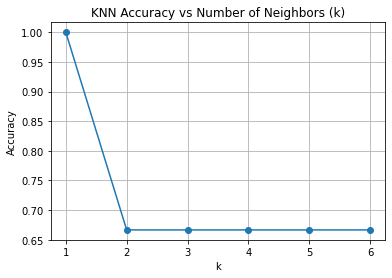

In [24]:
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs Number of Neighbors (k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### Large Dataset - Iris Dataset

In [25]:
# Load the dataset (ensure iris.csv is in your working directory)
df = pd.read_csv("Datasets/iris.csv")

In [26]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [27]:
df.shape

(150, 5)

In [28]:
pd.unique(df['variety'])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [29]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [30]:
# Separate features (X) and target (y)
X = df.drop('variety', axis=1)
y = df['variety']

In [31]:
# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize model
knn_iris = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Fit model
knn_iris.fit(X_train, y_train)

# Predict on test data
y_pred = knn_iris.predict(X_test)

In [33]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


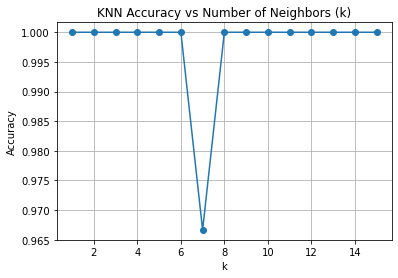

In [34]:
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs Number of Neighbors (k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### Scaling data

##### Why Do We Scale Data?

Feature scaling is a preprocessing step used to normalize the range of numerical features so that each contributes equally to the model’s decisions. In algorithms like K-Nearest Neighbors (KNN), distance is the key factor in predicting class labels — features with larger numeric ranges (e.g., income in thousands vs. age in years) can dominate the distance calculation and bias the model. Scaling transforms all features to a comparable scale, typically by standardizing (mean = 0, standard deviation = 1) or normalizing (range = 0 to 1) their values. This ensures that no single feature disproportionately influences the model’s distance computations, leading to fairer and more accurate results.

**StandardScaler Formula** :   Scaled_value = (value - mean) / standard_deviation

In [35]:
# Sample data
df = pd.DataFrame({'Age': [20, 30, 40]})

# Initialize and apply scaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print("mean :", np.mean([20, 30, 40]), "-- std =", np.std([20, 30, 40]))

print("Scaled values:", df_scaled.flatten())

mean : 30.0 -- std = 8.16496580927726
Scaled values: [-1.22474487  0.          1.22474487]


#### Scaling iris dataset

In [36]:
# Scaling Dataset - Since KNN is distance-based, scaling can impact results.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn_iris = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_iris.fit(X_train, y_train)
print("Accuracy with scaling:", knn_iris.score(X_test, y_test))

Accuracy with scaling: 1.0
